# Analysis of Housing Data in Charlottesville, Virginia
## STEP ONE: Importing necessary libraries
The goal is to understand the housing issues occurring in Charlottesville currently. 

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
!git clone https://github.com/veenaramesh/charlottesville_housing.git
 

Cloning into 'charlottesville_housing'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 39 (delta 10), reused 7 (delta 1), pack-reused 14
Unpacking objects: 100% (39/39), done.


## STEP TWO: Get the data

In [0]:
reba = pd.read_csv("charlottesville_housing/data/Real_Estate_Base_Active.csv")
usa = pd.read_csv("charlottesville_housing/data/Data USA Cart.csv")

dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m-%dT%H:%M:%S.%fZ")
res = pd.read_csv("charlottesville_housing/data/Real_Estate_Sales.csv", parse_dates=['SaleDate'], index_col = ["SaleDate"], date_parser=dateparse)

In [0]:
reba.head()

,RecordID_Int,ParcelNumber,Address,StreetNumber,StreetName,Unit,StateCode,TaxType,Zone,TaxDist,Legal,Acreage,GPIN
0,1,010001000,1117 EMMET ST N,1117,EMMET ST N,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,39.832 ACRES BARRACKS ROAD SHOPPING CENTER,39.830,1326
1,2,010001100,1035-67 MILLMONT ST,1035-67,MILLMONT ST,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,PARCEL W WEST BAR,2.140,15071
2,3,010001200,1159 MILLMONT ST,1159,MILLMONT ST,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,LOT C-1 WEST BAR,0.580,1280
3,4,010001300,1135-37 MILLMONT ST,1135-37,MILLMONT ST,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,LOT C-2B WEST BAR,0.400,1357
4,5,010001400,1111 MILLMONT ST,1111,MILLMONT ST,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,LOT B-1 WEST BAR,3.287,1366


In [0]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15546 entries, 0 to 15545
Data columns (total 13 columns):
RecordID_Int    15546 non-null int64
ParcelNumber    15546 non-null object
Address         15546 non-null object
StreetNumber    15499 non-null object
StreetName      15546 non-null object
Unit            1718 non-null object
StateCode       15546 non-null object
TaxType         15546 non-null object
Zone            15544 non-null object
TaxDist         401 non-null float64
Legal           15539 non-null object
Acreage         15544 non-null float64
GPIN            15546 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.5+ MB


In [0]:
res.head()

,RecordID_Int,ParcelNumber,SaleAmount,BookPage
SaleDate,,,,
1961-10-02,1001,030137000,18000,228:297
2009-08-27,1002,030138000,0,2009:3843
1961-10-02,1003,030138000,18000,228:297
1978-05-26,1004,030139000,120000,392:685
1998-02-11,1005,030139000,915000,712:342


In [0]:
res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51941 entries, 1961-10-02 to 2017-03-07
Data columns (total 4 columns):
RecordID_Int    51941 non-null int64
ParcelNumber    51941 non-null object
SaleAmount      51941 non-null int64
BookPage        51938 non-null object
dtypes: int64(2), object(2)
memory usage: 2.0+ MB


In [0]:
usa.head()

,geo_name,geo_sumlevel,geo_id,income_2013,income_2014,income_2015,income_2016,median_property_value_2013,median_property_value_2014,median_property_value_2015,median_property_value_2016
0,"Abanda, AL",place,16000US0100100,NaN,NaN,11207.0,NaN,NaN,NaN,NaN,NaN
1,"Abbeville, AL",place,16000US0100124,26500.0,27989.0,25615.0,28148.0,84600.0,77900.0,71600.0,77700.0
2,"Adamsville, AL",place,16000US0100460,45488.0,46005.0,42575.0,44833.0,99400.0,91900.0,95000.0,95300.0
3,"Addison, AL",place,16000US0100484,37917.0,38194.0,37083.0,34063.0,97000.0,94800.0,69300.0,67100.0
4,"Akron, AL",place,16000US0100676,23036.0,22813.0,21667.0,17344.0,61700.0,76400.0,72500.0,63300.0


In [0]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29616 entries, 0 to 29615
Data columns (total 11 columns):
geo_name                      29607 non-null object
geo_sumlevel                  29607 non-null object
geo_id                        29616 non-null object
income_2013                   28670 non-null float64
income_2014                   28764 non-null float64
income_2015                   27663 non-null float64
income_2016                   27680 non-null float64
median_property_value_2013    28293 non-null float64
median_property_value_2014    28397 non-null float64
median_property_value_2015    27521 non-null float64
median_property_value_2016    27502 non-null float64
dtypes: float64(8), object(3)
memory usage: 2.5+ MB


In [9]:
# drop all nan values; using an Imputer is not helpful
res.replace(0, np.nan, inplace = True)
res.dropna(axis=0, how='any', inplace = True)
res.index

DatetimeIndex(['1961-10-02', '1961-10-02', '1978-05-26', '1998-02-11',
               '1998-02-11', '1978-05-26', '2001-08-02', '1979-09-06',
               '2006-06-06', '1966-06-03',
               ...
               '1999-08-02', '2009-12-14', '2010-03-29', '1999-12-30',
               '1999-02-18', '2001-07-20', '2003-03-03', '1999-10-21',
               '1999-02-18', '2017-03-07'],
              dtype='datetime64[ns]', name='SaleDate', length=33583, freq=None)

In [10]:
res["year"] = res.index.year
res["month"] = res.index.month
res.head()

,RecordID_Int,ParcelNumber,SaleAmount,BookPage,year,month
SaleDate,,,,,,
1961-10-02,1001,030137000,18000.0,228:297,1961,10
1961-10-02,1003,030138000,18000.0,228:297,1961,10
1978-05-26,1004,030139000,120000.0,392:685,1978,5
1998-02-11,1005,030139000,915000.0,712:342,1998,2
1998-02-11,1006,030139100,915000.0,712:342,1998,2


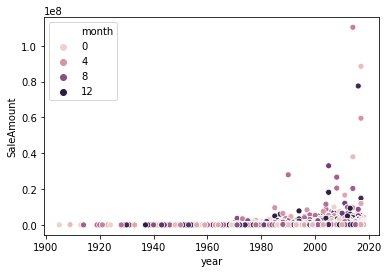

In [17]:
# scatterplot does not show much; the hue "month" is too specific to say any possible insight 
sns.scatterplot(x="year", y="SaleAmount", data=res, hue = "month")

In [15]:
# create seasons column using a dict;
seasons = ["Winter", "Winter", "Spring", 'Spring', 'Spring', "Summer", "Summer", "Summer", "Fall","Fall", "Fall", "Winter"]
month_to_season = dict(zip(range(1,13), seasons))
res["season"] = res["month"].map(month_to_season) 
res.head()

,RecordID_Int,ParcelNumber,SaleAmount,BookPage,year,month,season
SaleDate,,,,,,,
1961-10-02,1001,030137000,18000.0,228:297,1961,10,Fall
1961-10-02,1003,030138000,18000.0,228:297,1961,10,Fall
1978-05-26,1004,030139000,120000.0,392:685,1978,5,Spring
1998-02-11,1005,030139000,915000.0,712:342,1998,2,Winter
1998-02-11,1006,030139100,915000.0,712:342,1998,2,Winter


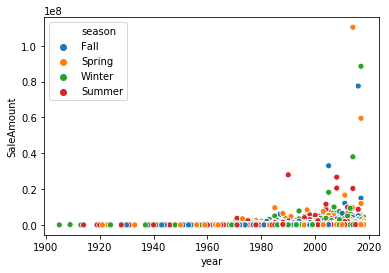

In [16]:
# seasons is also not an important distinguisher
sns.scatterplot(x="year", y="SaleAmount", data=res, hue = "season")

In [20]:
# see if zooming in helps understand the data better
res_last50 = res.loc[res['year'] > 1980]
res_last50.head()

,RecordID_Int,ParcelNumber,SaleAmount,BookPage,year,month,season
SaleDate,,,,,,,
1998-02-11,1005,030139000,915000.0,712:342,1998,2,Winter
1998-02-11,1006,030139100,915000.0,712:342,1998,2,Winter
2001-08-02,1008,030140000,128000.0,818:76,2001,8,Summer
2006-06-06,1010,030140000,245000.0,1087:426,2006,6,Summer
2007-05-02,1013,030142000,250000.0,1139:497,2007,5,Spring


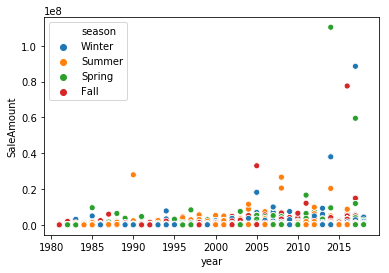

In [21]:
# data shown is from 1980 - current
# does not show a significant trend
sns.scatterplot(x="year", y="SaleAmount", data=res_last50, hue = "season")

In [25]:
# organize average sale amount per year
res_byyear = res.groupby("year").mean()
res_byyear.head()

,RecordID_Int,SaleAmount,month
year,,,
1905,40415.0,4000.0,1.0
1909,43397.0,165000.0,2.0
1913,21182.0,800.0,1.0
1914,25327.0,2000.0,7.0
1919,24997.0,7904.0,6.0


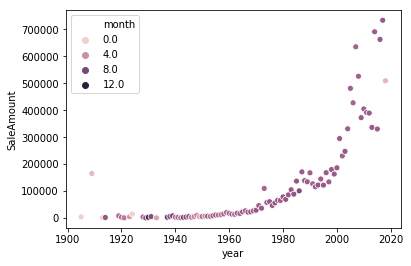

In [26]:
# aha ! finally something we can understand 
sns.scatterplot(x=res_byyear.index, y="SaleAmount", data=res_byyear, hue = "month")